In [11]:
import pandas as pd
import statistics as st
from scipy import stats

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from numpy.random import randn
from matplotlib.ticker import FuncFormatter

def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

# pandas is a software library for data manipulation and analysis
# We commonly use shorter nicknames for certain packages. Pandas is often abbreviated to pd.
# hit shift + enter to run this cell or block of code

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
path = r'~/Downloads/stroopdata.csv'
# Change the path to the location where the chopstick-effectiveness.csv file is located on your computer.
# If you get an error when running this block of code, be sure the chopstick-effectiveness.csv is located at the path on your computer.

stroopData = pd.read_csv(path)
stroopData

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


##Congruent

In [4]:
stroopData['Congruent'].mean()

14.051125000000004

In [5]:
stroopData['Congruent'].median()

14.3565

In [6]:
st.variance(stroopData['Congruent'].tolist())

12.669029070652176

In [7]:
st.stdev(stroopData['Congruent'].tolist())

3.5593579576451955

Populating the interactive namespace from numpy and matplotlib


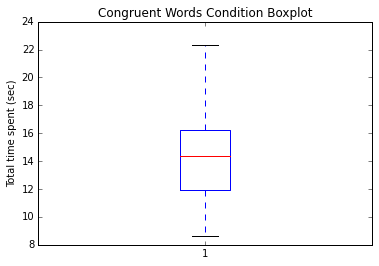

In [12]:
# basic plot

# Causes plots to display within the notebook rather than in a new window
%pylab inline

plt.boxplot(stroopData['Congruent'])
plt.ylabel("Total time spent (sec)")
plt.title("Congruent Words Condition Boxplot")

AttributeError: 'function' object has no attribute 'Normalize'

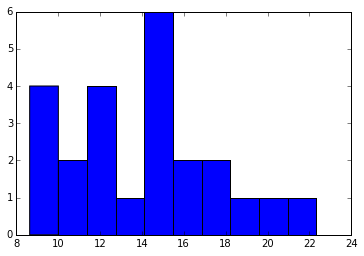

In [13]:
fig, ax = plt.subplots()
Ntotal = 1000
N, bins, patches = ax.hist(stroopData['Congruent'], 10)

# I'll color code by height, but you could use any scalar


# we need to normalize the data to 0..1 for the full
# range of the colormap
fracs = N.astype(float)/N.max()
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = cm.jet(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.xlabel("Total time spent (sec)")
plt.ylabel("Frequency (n)")
plt.title("Congruent Words Condition Histogram") 
plt.show()

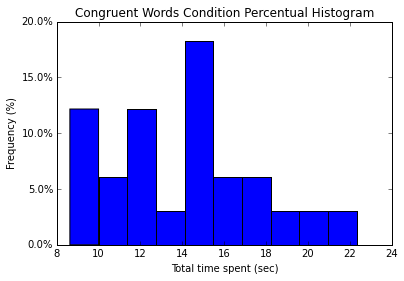

In [14]:
x = stroopData['Congruent']

# Make a normed histogram. It'll be multiplied by 100 later.
plt.hist(x, bins=10, normed=True)

# Create the formatter using the function to_percent. This multiplies all the
# default labels by 100, making them all percentages
formatter = FuncFormatter(to_percent)

# Set the formatter
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel("Total time spent (sec)")
plt.ylabel("Frequency (%)")
plt.title("Congruent Words Condition Percentual Histogram") 

plt.show()

##Incongruent

In [15]:
stroopData['Incongruent'].mean()

22.01591666666667

In [16]:
stroopData['Incongruent'].median()

21.0175

In [17]:
st.variance(stroopData['Incongruent'].tolist())

23.011757036231884

In [18]:
st.stdev(stroopData['Incongruent'].tolist())

4.797057122469138

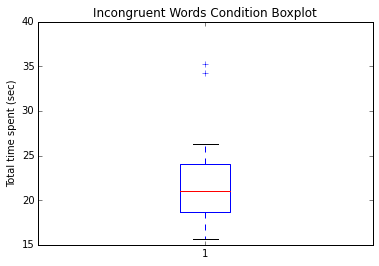

In [19]:
# basic plot
plt.boxplot(stroopData['Incongruent'])
plt.ylabel("Total time spent (sec)")
plt.title("Incongruent Words Condition Boxplot")

AttributeError: 'function' object has no attribute 'Normalize'

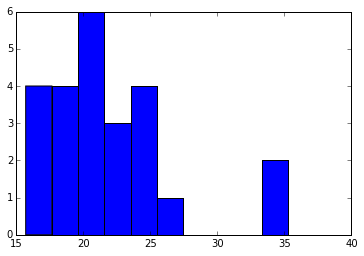

In [20]:
fig, ax = plt.subplots()
Ntotal = 1000
N, bins, patches = ax.hist(stroopData['Incongruent'], 10)

# I'll color code by height, but you could use any scalar


# we need to normalize the data to 0..1 for the full
# range of the colormap
fracs = N.astype(float)/N.max()
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = cm.jet(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.xlabel("Total time spent (sec)")
plt.ylabel("Frequency (n)")
plt.title("Incongruent Words Condition Histogram") 
plt.show()

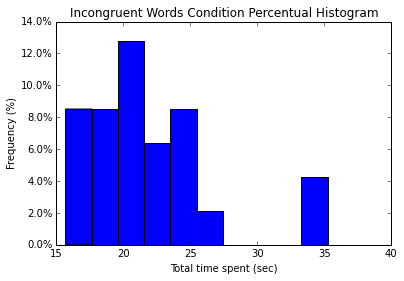

In [21]:
x = stroopData['Incongruent']

# Make a normed histogram. It'll be multiplied by 100 later.
plt.hist(x, bins=10, normed=True)

# Create the formatter using the function to_percent. This multiplies all the
# default labels by 100, making them all percentages
formatter = FuncFormatter(to_percent)

# Set the formatter
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel("Total time spent (sec)")
plt.ylabel("Frequency (%)")
plt.title("Incongruent Words Condition Percentual Histogram") 

plt.show()

## t-Test

In [24]:
#This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.
stats.ttest_rel(stroopData['Congruent'].tolist(),stroopData['Incongruent'].tolist())

(-8.020706944109957, 4.1030005857111781e-08)